> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

The dataset was taken from the movie database (TMDB) it is like a movies hub of all the movies over the years with all information about each move. In this analysis we will analyze the profitability of file industry over the years. and to do that we will focus on the following.

Revenue

Budget or Cost

Profit

Genre

Release_Date

Release_Year

Title od Movies

We want to understand is film industry is profitable or not.if yes, where can I suggest to invest your money.

**Questions To Answer**

Which genres are most popular from year to year?

What kinds of properties are associated with movies that have high revenues?

Highest & Lowest Revenue?

Highest & Lowest Budget?

Highest & Lowest Net Profit?

Longest & Shortest Runtime?

What is an Average Runtime?

What is an Average Profit?

What is an Average Revenue?

What is an Average Budget?

Relationship Between Profit & Budget Over the Years (ROI)?

Top Genres Over the Years?

Top Cast Over the Years?

Actors with the Most Apperances in the Films?

Average Votes Distribution

Ratings Distribution by Year

Correlations

In [30]:
# Use this cell to set up import statements for all of the packages that you plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted inline with the notebook.
# See this page for more: http://ipython.readthedocs.io/en/stable/interactive/magics.html

# Import all Libraries that you are going to use in the project
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

# Reading the Data

In [31]:
# Load your data and print out a few lines.
# Perform operations to inspect data types and look for instances of missing or possibly errant data.

tmdb=pd.read_csv('tmdb-movies.csv')

In [32]:
print(tmdb.shape)

(10866, 21)


# Printing data columns

Lets find out the name of the columns for this dataset

In [33]:
print(list(tmdb.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


# Inspecting the Rows from the Data

Here the rows from the TMdb dataset are presented, let's at each column. There are id columns as a unique value corresponding to each row - entry, which on its side represents each movie. There are other columns which describes financial values such budget and revenue. Other columns include information like the genre of this movie, the production companies, the release_date, the crowd's votes.

In [34]:
tmdb.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [35]:
# After discussing the structure of the data and any problems that need to be cleaned.
# Perform those cleaning steps in the second part of this section.

# Assess the Data of Movies
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [36]:
# Removing NAN Values from Cast Column, Keeping only movies, that has casted actors.
# Also Removing Rows where revenue_adj and budget_adj is equal to zero

tmdb = tmdb[tmdb["cast"].isnull() == False]
tmdb = tmdb[tmdb["genres"].isnull() == False]

tmdb = tmdb[tmdb.budget_adj != 0]
tmdb = tmdb[tmdb.revenue_adj != 0]

# Check Duplicate and Remove it if Necessary

In [37]:
# Check Duplicate
print('There is {} duplicated rows in the TMDB'.format(sum(tmdb.duplicated())))

There is 1 duplicated rows in the TMDB


In [38]:
# We need to Remove Duplicated Row by Using Drop
tmdb.drop_duplicates(inplace=True)
print('There is {} duplicated rows in the TMDB'.format(sum(tmdb.duplicated())))

There is 0 duplicated rows in the TMDB


# Change Data Type and Format

In [39]:
# Change Data Type & Format
tmdb['release_date']=pd.to_datetime(tmdb['release_date'])

# Change Data Type of 'rev budj'
tmdb['budget']=tmdb['budget'].apply(np.int64)
tmdb['revenue']=tmdb['revenue'].apply(np.int64)
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 21 columns):
id                      3850 non-null int64
imdb_id                 3850 non-null object
popularity              3850 non-null float64
budget                  3850 non-null int64
revenue                 3850 non-null int64
original_title          3850 non-null object
cast                    3850 non-null object
homepage                1425 non-null object
director                3849 non-null object
tagline                 3572 non-null object
keywords                3713 non-null object
overview                3850 non-null object
runtime                 3850 non-null int64
genres                  3850 non-null object
production_companies    3806 non-null object
release_date            3850 non-null datetime64[ns]
vote_count              3850 non-null int64
vote_average            3850 non-null float64
release_year            3850 non-null int64
budget_adj              3850 non-

In [40]:
tmdb.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15       5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

# Descriptive Statistics

In this section basic descriptive statistics are being presented for each column from the dataset.

In [41]:
# Basic Descriptive Statistics

tmdb.describe()

id   popularity        budget       revenue      runtime  \
count    3850.000000  3850.000000  3.850000e+03  3.850000e+03  3850.000000   
mean    39878.804416     1.192661  3.724027e+07  1.077897e+08   109.228831   
std     67241.305740     1.475527  4.221487e+07  1.766015e+08    19.924053   
min         5.000000     0.001117  1.000000e+00  2.000000e+00    15.000000   
25%      6072.250000     0.463201  1.000000e+07  1.363273e+07    95.250000   
50%     11316.000000     0.798343  2.400000e+07  4.488472e+07   106.000000   
75%     38573.250000     1.372826  5.000000e+07  1.242969e+08   119.000000   
max    417859.000000    32.985763  4.250000e+08  2.781506e+09   338.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  3850.000000   3850.000000   3850.000000  3.850000e+03  3.850000e+03  
mean    528.252727      6.168597   2001.260000  4.428320e+07  1.371986e+08  
std     880.258758      0.794616     11.284699  4.481243e+07  2.161832e+08  
min      10.000000      2.200000   1960.000000  9.693980e-01  2.370705e+00  
25%      71.000000      5.700000   1995.000000  1.314346e+07  1.841498e+07  
50%     204.500000      6.200000   2004.000000  3.004524e+07  6.179073e+07  
75%     580.750000      6.700000   2010.000000  6.072867e+07  1.633775e+08  
max    9767.000000      8.400000   2015.000000  4.250000e+08  2.827124e+09

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which Genres are most Popular from Year to Year?)

The next 2 figures, show the flactuations of movie genres from year to year.
Two different plots were used; bar and area plot to visualize the movie genres' changes/flactuations/trends from year to year.

In [45]:
years = set()
genres = set()
genres_year = tmdb[["genres", "release_year"]]

# Create a set of Unique Years of Movies
prod_year = genres_year["release_year"]
prod_year = prod_year.drop_duplicates()
for year in prod_year:
    if year not in years:
        years.add(year)

#print(year_set)

# Create a Set of Unique Genres by Parsing All the Years

for year in years:
    genre_dict = {}
    genres_in_year = genres_year[genres_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genres:
                genres.add(genre)
#print("year:", year, "\n", sorted(genre_dict.items(), key = operator.itemgetter(1), reverse = True))

# Create a Dataframe which contains the Sum of Movies' Genre Per Year

genre_cpy_df = pd.DataFrame(index = years, columns=genres)
genre_cpy_df[:] = 0

for year in years:
    genre_dict = {}
    genres_in_year = genres_year[genres_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_dict:
                genre_dict[genre] = 1
            else:
                genre_dict[genre] = genre_dict[genre] + 1
    aux_df = pd.DataFrame(genre_dict, index = [year])
    genre_cpy_df.loc[year, aux_df.columns] = genre_cpy_df.loc[year, aux_df.columns] + aux_df.loc[year]

# Most Popular Genre of Movies From Year to Year

most_pg_by_year = pd.DataFrame([genre_cpy_df.idxmax(axis = 1).values,
                                          genre_cpy_df.apply( max, axis=1 ).values],
                                          columns = genre_cpy_df.index,
                                         index = ["genre", 'counts'])

### Research Question 2  (What kinds of Properties are Associated with Movies that have High Revenues?)

The following code snippet produce the barplot representing the top 10 movies based on their adjusted revenue.

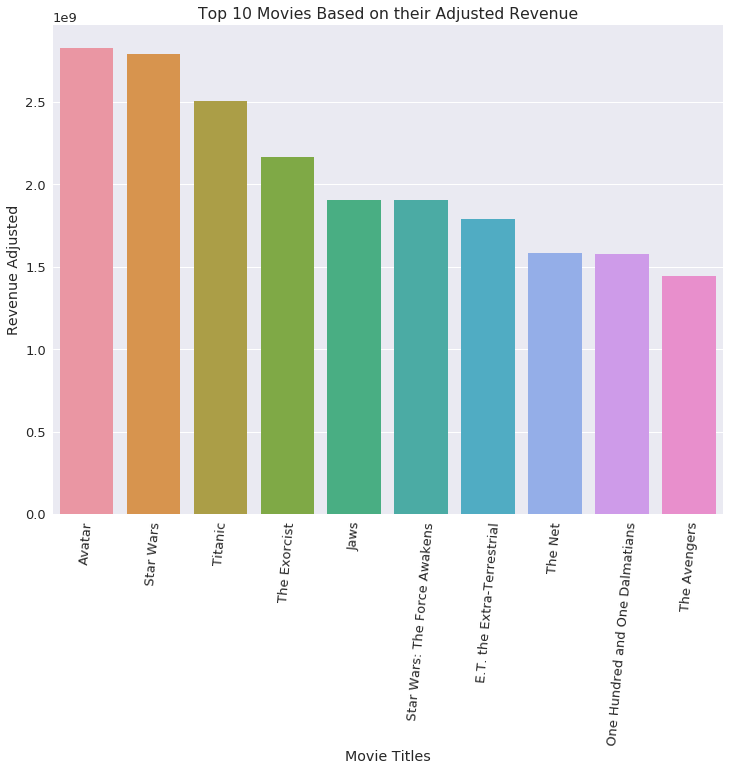

In [46]:
# Continue to explore the data to address your additional research questions.
# Add more headers as needed if you have more questions to investigate.

revenue_dict = {}

# Fetching Different Columns with 2 Different ways of Code
movies_rev = tmdb[["original_title", "revenue_adj"]]

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)

ax = sns.barplot(
    movies_rev.sort_values(by = "revenue_adj", ascending=False).head(10).original_title, 
    movies_rev.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)

# Rotate x-axis' Text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    
ax.set(xlabel='Movie Titles', ylabel='Revenue Adjusted', title = 'Top 10 Movies Based on their Adjusted Revenue')
plt.show()

According to the table above, the top 5 movies from the given dataset based on their adjusted revenue are the followings;

**Findings:**

Avatar

Star Wars

Titanic

The Exorcist

Jaws

**Highest & Lowest Revenue**

Since we will use highest and lowest code for many columns we want to create definition

In [52]:
# Remove Zero's & NAN from Data as we need it.
# There is no Revenue or Budget = 0
tmdb['budget']=tmdb['budget'].replace(0,np.NAN)
tmdb['revenue']=tmdb['revenue'].replace(0,np.NAN)
tmdb.dropna(inplace=True)
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-

In [53]:
def calc(coldata):
    
    # Find the Highest Value Index in the Column
    hv_index=tmdb[coldata].idxmax()
    lv_index=tmdb[coldata].idxmin()
    
    # Then Plug it into Extraction Row Infromation [highest=pd.DataFrame()]
    highest=pd.DataFrame(tmdb.loc[hv_index])
    lowest=pd.DataFrame(tmdb.loc[lv_index])
    output=pd.concat([highest,lowest],axis=1)
    return output

# Print the Output
calc('revenue')

1386  \
id                                                                19995   
imdb_id                                                       tt0499549   
popularity                                                      9.43277   
budget                                                        237000000   
revenue                                                      2781505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
homepage                                    http://www.avatarmovie.com/   
director                                                  James Cameron   
tagline                                     Enter the World of Pandora.   
keywords              culture clash|future|space war|space colony|so...   
overview              In the 22nd century, a paraplegic Marine is di...   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_count                                                         8458   
vote_average                                                        7.1   
release_year                                                       2009   
budget_adj                                                  2.40887e+08   
revenue_adj                                                 2.82712e+09   

                                                                   2398  
id                                                                39356  
imdb_id                                                       tt1560139  
popularity                                                     0.028456  
budget                                                                3  
revenue                                                              43  
original_title                                                      Boy  
cast                  James Rolleston|Craig Hall|Taika Waititi|Te Ah...  
homepage                                   http://www.boythemovie.co.nz  
director                                                  Taika Waititi  
tagline               Summer, Girls, Gangs, Drugs ... its not easy b...  
keywords               new zealand|maori|farm|goat|duringcreditsstinger  
overview              It's 1984, and Michael Jackson is king - even ...  
runtime                                                              87  
genres                                                     Drama|Comedy  
production_companies  New Zealand Film Commission|Unison Films|Whenu...  
release_date                                        2010-02-14 00:00:00  
vote_count                                                           26  
vote_average                                                        7.3  
release_year                                                       2010  
budget_adj                                                            3  
revenue_adj                                                          43

# Highest & Lowest Budget

In [54]:
calc('budget')

2244  \
id                                                                46528   
imdb_id                                                       tt1032751   
popularity                                                      0.25054   
budget                                                        425000000   
revenue                                                        11087569   
original_title                                        The Warrior's Way   
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
homepage                         http://www.iamrogue.com/thewarriorsway   
director                                                     Sngmoo Lee   
tagline                                         Assassin. Hero. Legend.   
keywords              assassin|small town|revenge|deception|super speed   
overview              An Asian assassin (Dong-gun Jang) is forced to...   
runtime                                                             100   
genres                        Adventure|Fantasy|Action|Western|Thriller   
production_companies                           Boram Entertainment Inc.   
release_date                                        2010-12-02 00:00:00   
vote_count                                                           74   
vote_average                                                        6.4   
release_year                                                       2010   
budget_adj                                                     4.25e+08   
revenue_adj                                                 1.10876e+07   

                                                                   3581  
id                                                                59296  
imdb_id                                                       tt1436559  
popularity                                                      0.52043  
budget                                                                1  
revenue                                                            1378  
original_title                                  Love, Wedding, Marriage  
cast                  Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...  
homepage              http://www.ifcfilms.com/films/love-wedding-mar...  
director                                                Dermot Mulroney  
tagline                                            Here comes the ride.  
keywords                                     wedding vows|marriage|love  
overview              A happy newlywed marriage counselor's views on...  
runtime                                                              90  
genres                                                   Comedy|Romance  
production_companies  120dB Films|Scion Films|Voodoo Production Serv...  
release_date                                        2011-06-03 00:00:00  
vote_count                                                           55  
vote_average                                                        5.3  
release_year                                                       2011  
budget_adj                                                     0.969398  
revenue_adj                                                     1335.83

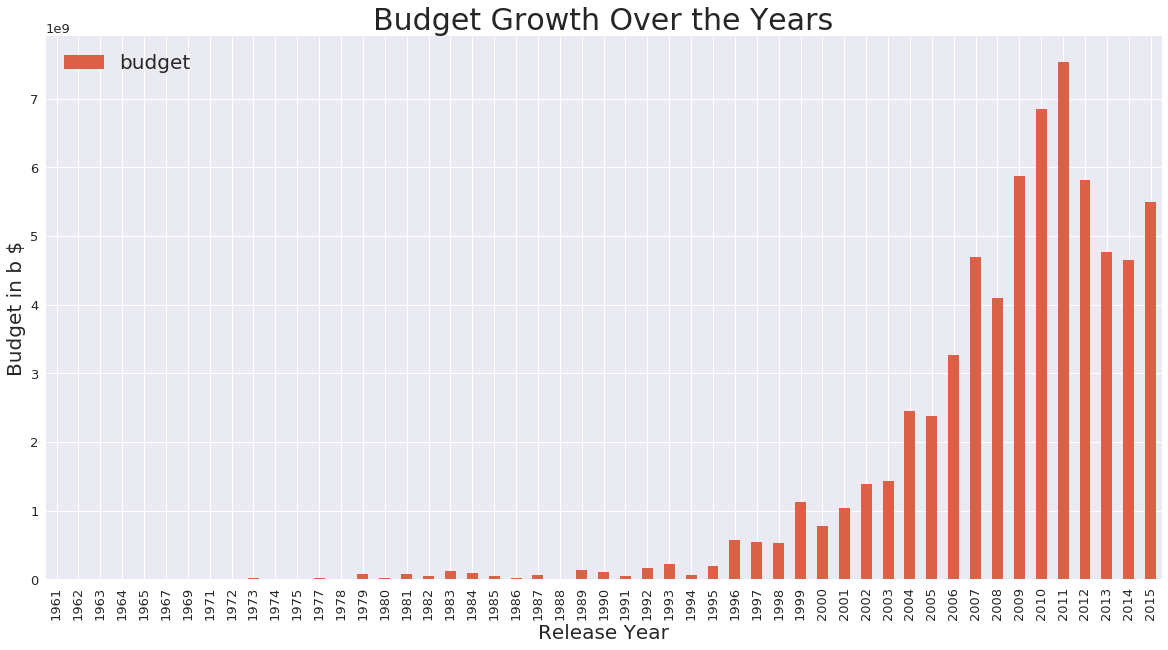

In [55]:
# Graph to Represent the Budget Growth Over the Years

rcount=tmdb.groupby('release_year')['budget'].sum()
plt.figure(figsize=(20,10))
rcount.plot(kind='bar',color='#DC6046')
plt.ylabel('Budget in b $',fontsize=(20))
plt.xlabel('Release Year',fontsize=(20))
plt.legend(fontsize=(20))
plt.title('Budget Growth Over the Years',fontsize=(30));

# Highest & Lowest Net Profit

In [56]:
# We Need to Add Profit in our Dataset

tmdb['profit']=tmdb['revenue']-tmdb['budget']
calc('profit')

1386  \
id                                                                19995   
imdb_id                                                       tt0499549   
popularity                                                      9.43277   
budget                                                        237000000   
revenue                                                      2781505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
homepage                                    http://www.avatarmovie.com/   
director                                                  James Cameron   
tagline                                     Enter the World of Pandora.   
keywords              culture clash|future|space war|space colony|so...   
overview              In the 22nd century, a paraplegic Marine is di...   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_count                                                         8458   
vote_average                                                        7.1   
release_year                                                       2009   
budget_adj                                                  2.40887e+08   
revenue_adj                                                 2.82712e+09   
profit                                                       2544505847   

                                                                   2244  
id                                                                46528  
imdb_id                                                       tt1032751  
popularity                                                      0.25054  
budget                                                        425000000  
revenue                                                        11087569  
original_title                                        The Warrior's Way  
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  
homepage                         http://www.iamrogue.com/thewarriorsway  
director                                                     Sngmoo Lee  
tagline                                         Assassin. Hero. Legend.  
keywords              assassin|small town|revenge|deception|super speed  
overview              An Asian assassin (Dong-gun Jang) is forced to...  
runtime                                                             100  
genres                        Adventure|Fantasy|Action|Western|Thriller  
production_companies                           Boram Entertainment Inc.  
release_date                                        2010-12-02 00:00:00  
vote_count                                                           74  
vote_average                                                        6.4  
release_year                                                       2010  
budget_adj                                                     4.25e+08  
revenue_adj                                                 1.10876e+07  
profit                                                       -413912431

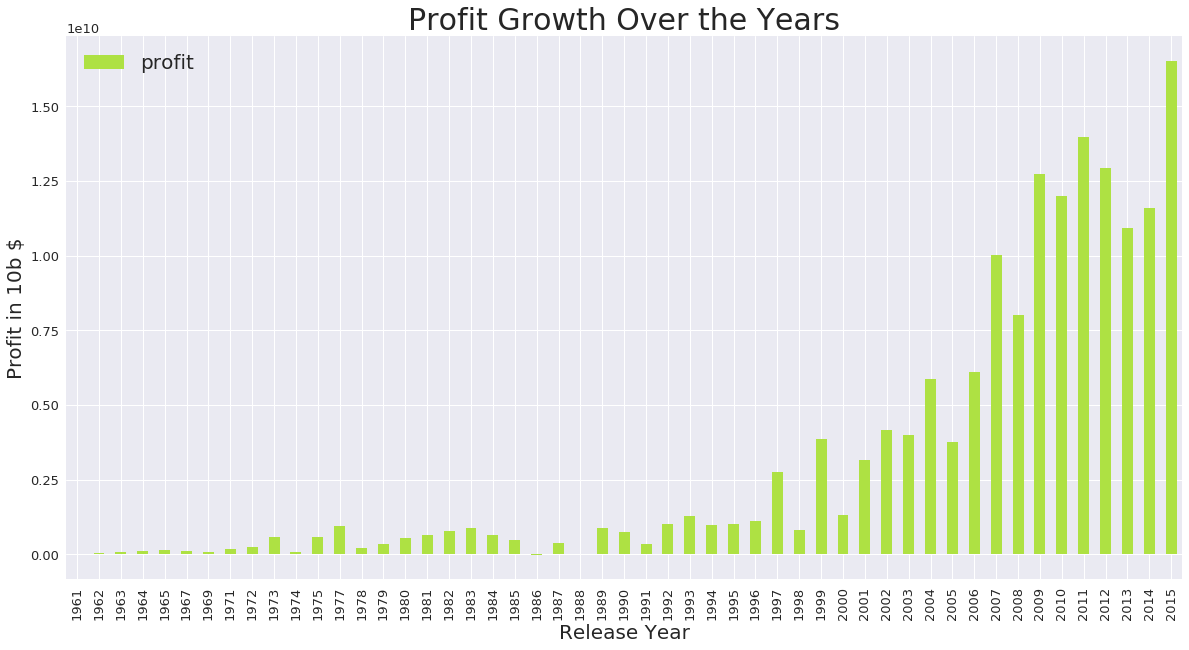

In [57]:
# Graph to Represent the Profit Growth Over the Years

rcount=tmdb.groupby('release_year')['profit'].sum()
plt.figure(figsize=(20,10))
rcount.plot(kind='bar',color='#AEE143')
plt.ylabel('Profit in 10b $',fontsize=(20))
plt.xlabel('Release Year',fontsize=(20))
plt.legend(fontsize=(20))
plt.title('Profit Growth Over the Years',fontsize=(30));

**Findings:**

Profit is the most important factor in our analysis to see if film industry is profitable or not.

But profit by it self can not show the impact of business growth by it self. We need to see the relationship between profit and cost as well. And we are going to see the same later.

# Longest & Shortest Runtime

In [58]:
calc('runtime')

4949  \
id                                                                  122   
imdb_id                                                       tt0167260   
popularity                                                      7.12246   
budget                                                         94000000   
revenue                                                      1118888979   
original_title            The Lord of the Rings: The Return of the King   
cast                  Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...   
homepage                                  http://www.lordoftherings.net   
director                                                  Peter Jackson   
tagline                                 The eye of the enemy is moving.   
keywords              elves|orcs|middle-earth (tolkien)|based on nov...   
overview              Aragorn is revealed as the heir to the ancient...   
runtime                                                             201   
genres                                         Adventure|Fantasy|Action   
production_companies                      WingNut Films|New Line Cinema   
release_date                                        2003-12-01 00:00:00   
vote_count                                                         5636   
vote_average                                                        7.9   
release_year                                                       2003   
budget_adj                                                  1.11423e+08   
revenue_adj                                                 1.32628e+09   
profit                                                       1024888979   

                                                                   3424  
id                                                                51162  
imdb_id                                                       tt1449283  
popularity                                                      1.42534  
budget                                                         30000000  
revenue                                                        14460000  
original_title                                          Winnie the Pooh  
cast                  Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...  
homepage                                http://disney.go.com/pooh/home/  
director                                      Stephen Anderson|Don Hall  
tagline                                                        Oh Pooh.  
keywords              owl|tiger|aftercreditsstinger|duringcreditssti...  
overview              During an ordinary day in Hundred Acre Wood, W...  
runtime                                                              63  
genres                                                 Animation|Family  
production_companies  Walt Disney Pictures|Walt Disney Animation Stu...  
release_date                                        2011-04-13 00:00:00  
vote_count                                                          174  
vote_average                                                        6.8  
release_year                                                       2011  
budget_adj                                                  2.90819e+07  
revenue_adj                                                 1.40175e+07  
profit                                                        -15540000

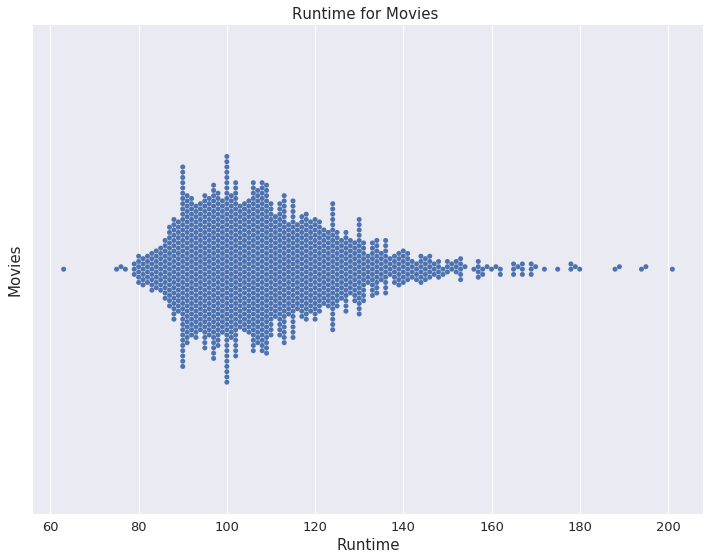

In [59]:
# Graph to Represent the Runtime for Movies

plt.figure()
sns.swarmplot(tmdb['runtime'])
plt.ylabel('Movies',fontsize=(15))
plt.xlabel('Runtime',fontsize=(15))

plt.title('Runtime for Movies ',fontsize=(15))

plt.show()

**Findings:**

This Swarmplot will show you the spread of Movies with Runtime

In [60]:
tmdb['runtime'].describe()

count    1287.000000
mean      110.273504
std        18.811369
min        63.000000
25%        97.000000
50%       107.000000
75%       121.000000
max       201.000000
Name: runtime, dtype: float64

# What is an Average Runtime?

In [62]:
# Avreage Runtime
x=tmdb['runtime'].mean()
print('The Average Runtime is {}'.format(x))

The Average Runtime is 110.27350427350427


# What is an Average Profit?

In [63]:
# Average Profit
x=tmdb['profit'].mean()
print('The Average Profit is {}'.format(x))

The Average Profit is 124240946.33333333


# What is an Average Revenue?

In [64]:
# Average Revenue
x=tmdb['revenue'].mean()
print('The Average Revenue is {}'.format(x))

The Average Revenue is 176244438.6853147


# What is an Average Budget?

In [66]:
# Average Budget
x=tmdb['budget'].mean()
print('The Average Budget is {}'.format(x))

The Average Budget is 52003492.35198135


# Relationship Between Profit & Budget Over the Years (ROI)?


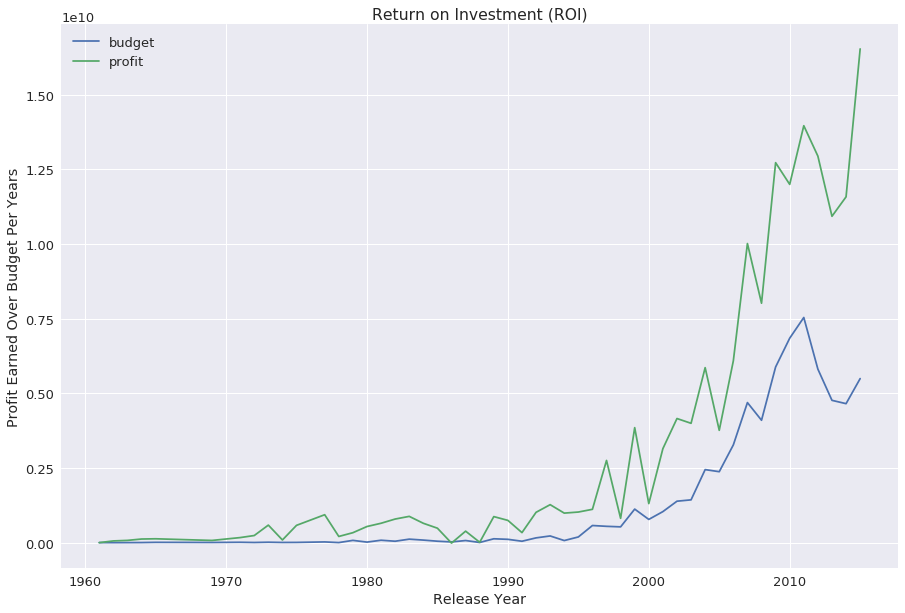

In [67]:
# Plot the Relationship Between Profit & Budget Over the Years (ROI)

plt.figure(figsize=(15,10))
rev_data=tmdb.groupby('release_year')['revenue'].sum()
budj_data=tmdb.groupby('release_year')['budget'].sum()
prof_data=tmdb.groupby('release_year')['profit'].sum()

#plt.plot(rev_data,label='Revenue')
plt.plot(budj_data,label='budget')
plt.plot(prof_data,label='profit')

plt.legend()
plt.title('Return on Investment (ROI)')
plt.xlabel('Release Year')
plt.ylabel('Profit Earned Over Budget Per Years');

#plt.plot(tmdb['budget'],tmdb['release_date'],label='budget')
#plt.plot(tmdb['profit'],tmdb['release_date'],label='budget')

# In the Above Graph we Clearly see the Return on Investment Gap was Increased Over the Years.

**Findings:**

The increase of profit or budget by itself does not indicate proftability.
    
    It might be because of inflation rate over the years.
    
    Currency Exchange data is not provided in dataset

The Gap between budget and profit was increased Significantly over the years that is good indicator that business is proftable and that becouse of many factors such as:
    
    Cost Management (ex: Use technology to Save Money)
    
    Revenue Management(Pricing Strategy, Ancillary Revenue)
    
    Better Marketing Management

# Top Genres Over the Years?

In [68]:
# We Need to Consider Removing Any Movies Revenue Less than 40,000,000 $
clean_data=tmdb
clean_data=tmdb[tmdb['revenue']>= 40000000]
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 10760
Data columns (total 22 columns):
id                      861 non-null int64
imdb_id                 861 non-null object
popularity              861 non-null float64
budget                  861 non-null int64
revenue                 861 non-null int64
original_title          861 non-null object
cast                    861 non-null object
homepage                861 non-null object
director                861 non-null object
tagline                 861 non-null object
keywords                861 non-null object
overview                861 non-null object
runtime                 861 non-null int64
genres                  861 non-null object
production_companies    861 non-null object
release_date            861 non-null datetime64[ns]
vote_count              861 non-null int64
vote_average            861 non-null float64
release_year            861 non-null int64
budget_adj              861 non-null float64
revenue_

In [69]:
# Most Profitable Genre and Top Actors as well Function

def most(x):
    data=clean_data[x].str.cat(sep='|')
    data=pd.Series(data.split('|'))
    count=data.value_counts(ascending=False)
    
    return count

# Recall the function for Genre
mostgenres=most('genres').head(10)
mostgenres

Action             330
Drama              290
Comedy             275
Thriller           259
Adventure          257
Science Fiction    158
Family             144
Fantasy            134
Romance            115
Crime              112
dtype: int64

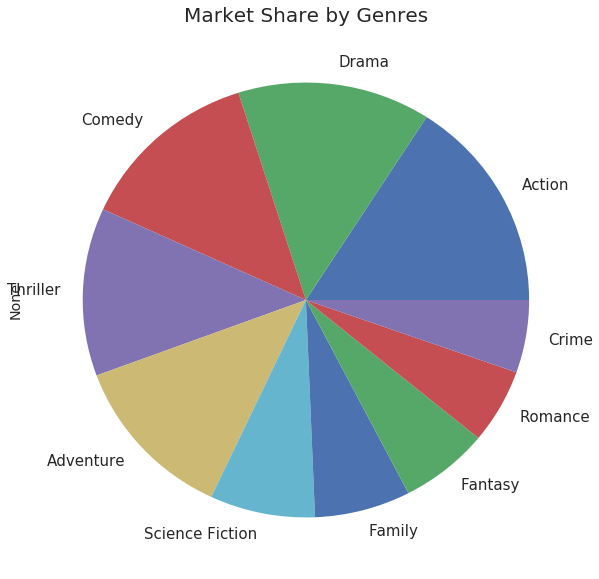

In [70]:
# Graph to Represent the Market Share by Genres
plt.figure(figsize=(10,10))
genre_chart=mostgenres.plot.pie(fontsize=15)
plt.title('Market Share by Genres',fontsize=20);

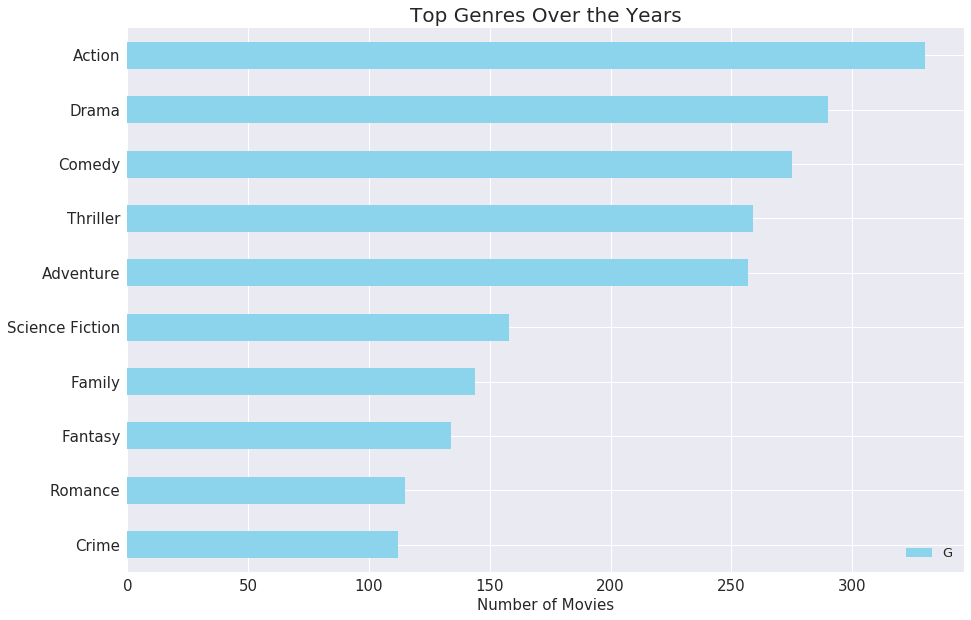

In [71]:
# Top Genres Over the Years
plt.figure(figsize=(15,10))
genre_chart=mostgenres.plot.barh(fontsize=15,color='#8cd4eb')
plt.gca().invert_yaxis()
plt.title('Top Genres Over the Years',fontsize=(20));
plt.xlabel('Number of Movies',fontsize=(15))
plt.legend('Genres');

# Top Cast Over the Years?

In [72]:
# Top Cast Over the Years
mostcast=most('cast').head(10)
mostcast

Matt Damon           18
Mark Wahlberg        16
Anne Hathaway        14
Tom Hanks            13
Tom Cruise           13
Brad Pitt            13
Cameron Diaz         13
George Clooney       13
Harrison Ford        13
Samuel L. Jackson    12
dtype: int64

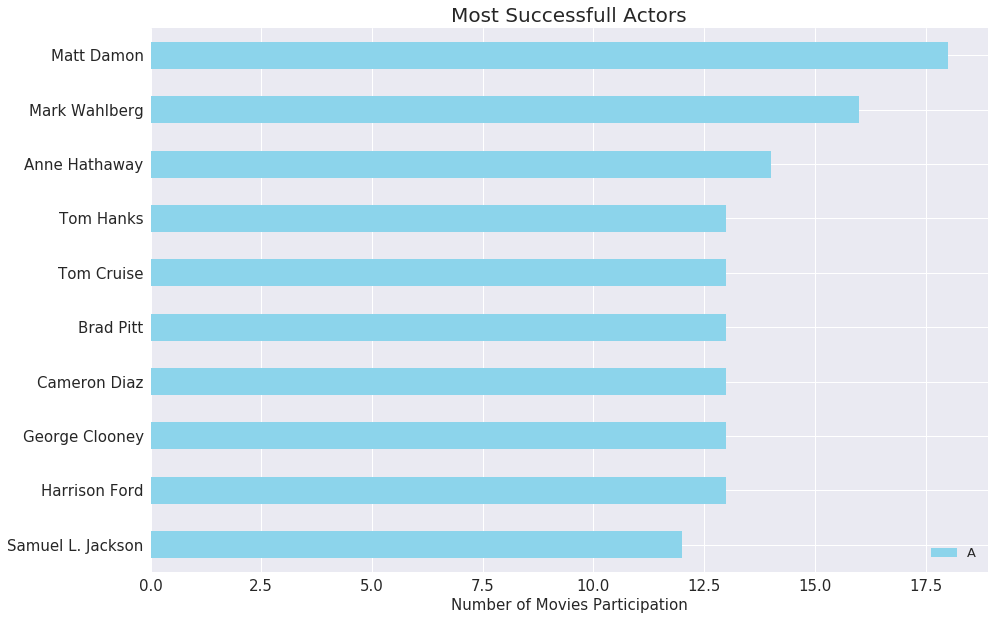

In [73]:
# Graph to Represent the Top Cast Over the Years
plt.figure(figsize=(15,10))
cast_chart=mostcast.plot.barh(fontsize=15,color='#8cd4eb')
plt.gca().invert_yaxis()
plt.title('Most Successfull Actors',fontsize=(20));
plt.xlabel('Number of Movies Participation',fontsize=(15))
plt.legend('Actors');

# Average Votes Distribution

Let's move to somewhere else. There is some curiosity about the movie's average votes.

Lets see their distribution. The following code creates a boxplot which illustrates their mean which is about 6.

Also two plots were created; one with the distribution of the ratings from 1960 to 2015 and another with the ratings distribution from by year.

In [75]:
temp = genre_cpy_df.apply(sum)
temp = temp.sort_values(ascending= False)

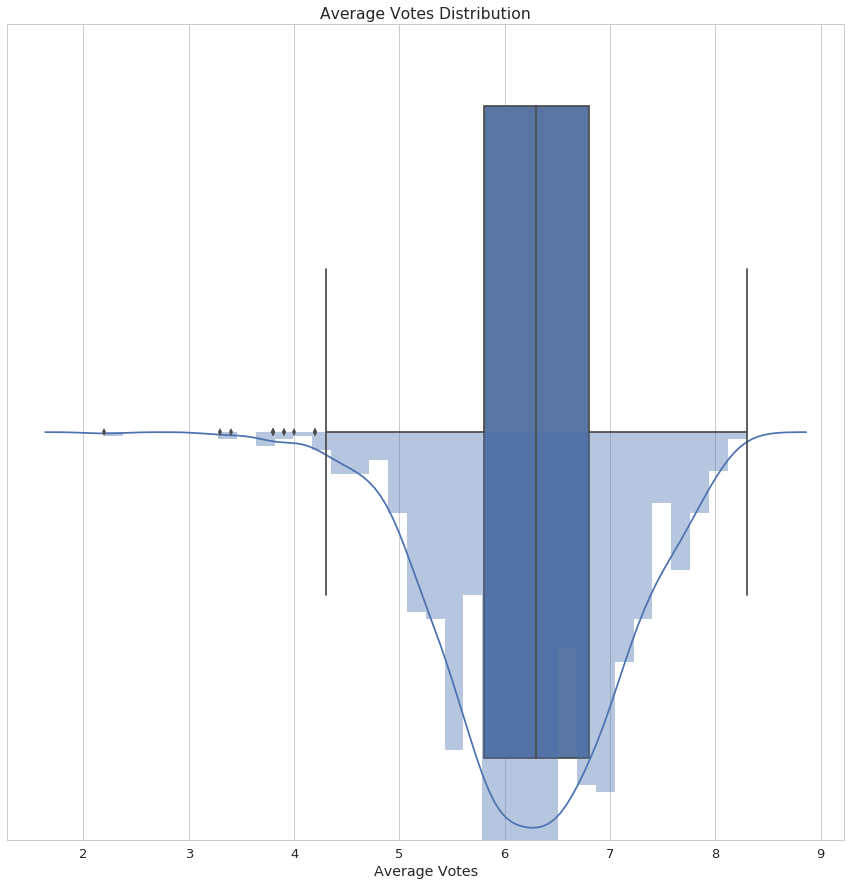

In [77]:
# Movie Ratings Distribution All Over the Years

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = tmdb[["vote_average"]]

sns.set_style("whitegrid")
ax = sns.distplot(temp_df.vote_average)

ax = sns.boxplot(x = temp_df.vote_average)

ax.set(xlabel='Average Votes', title = 'Average Votes Distribution')
plt.show()

# Ratings Distribution by Year

The previous question shows that the mean of the ratings all over these years (1960 - 2015) are almost 6.
What about the ratings at a specific year? 

The following snippet code creates a plot showing the ratings distributions per year.

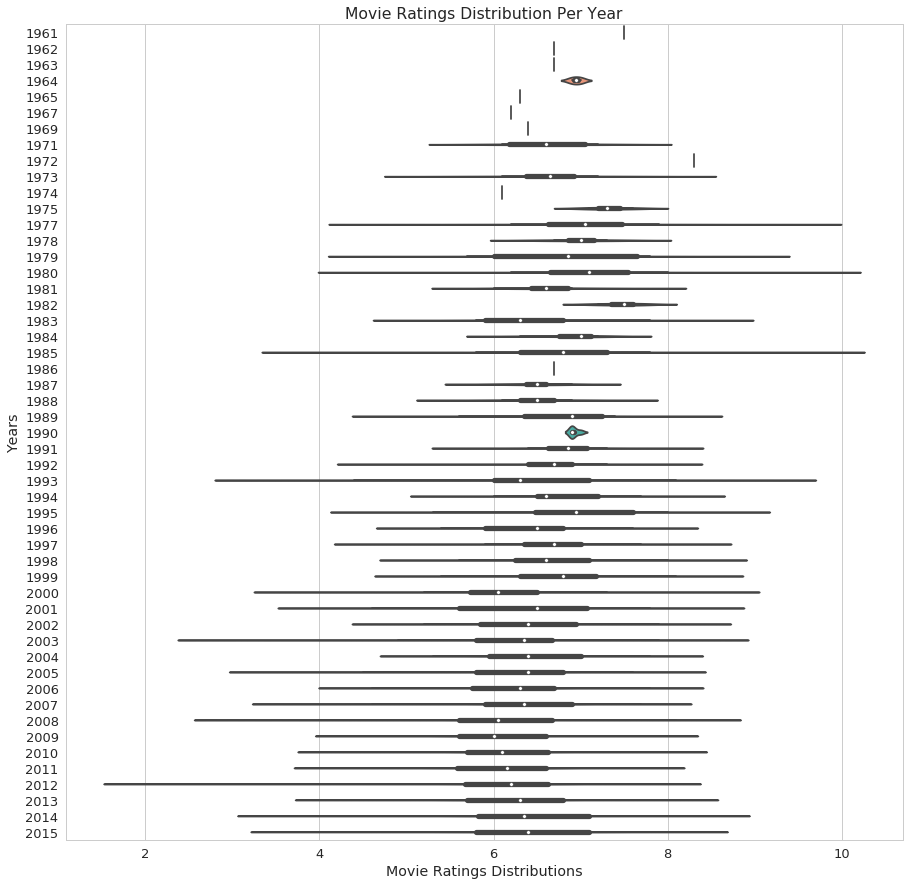

In [78]:
# Movie Ratings Distribution Per Year

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = tmdb[["release_year", "vote_average"]]

sns.set_style("whitegrid")
ax = sns.violinplot(x = temp_df.vote_average, y = temp_df.release_year, orient ="h")

ax.set(xlabel='Movie Ratings Distributions', ylabel='Years', title = 'Movie Ratings Distribution Per Year')
plt.show()

**Findings:**

The Above Graph illustrates that all the years have mean ratings about 6 to 6.5.

However some exclusions such as the year 1974 has mean ratings around 7.

It seems that during that time great movies with high impact on the crowd were produced.

# Correlations

This section deals with the correlations. The creation of this part was inspired by looking at the top 5 movies based on some characteristics (adjusted revenue, adjusted budget, popularity and average votes). We were expecting that regardless the features the top 5 movies would be the same.

However this notion did not appear. So to investigate it even more scatterplots and correlations between the adjusted revenue, the adjusted budget, movies' popularity and vote average were produced. The code below produce scatterplots with pairs of these 4 variables.

Text(0.5,0.98,'ScatterPlot & Correlation for popularity and vote_average')

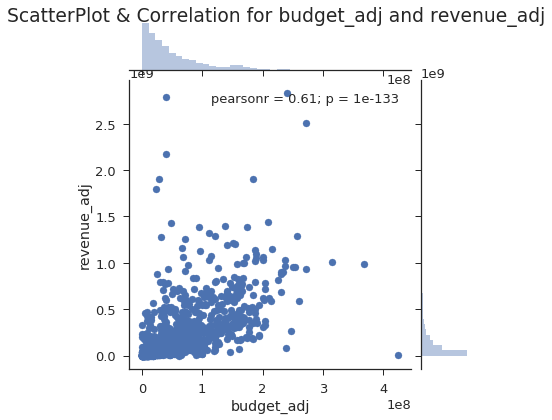

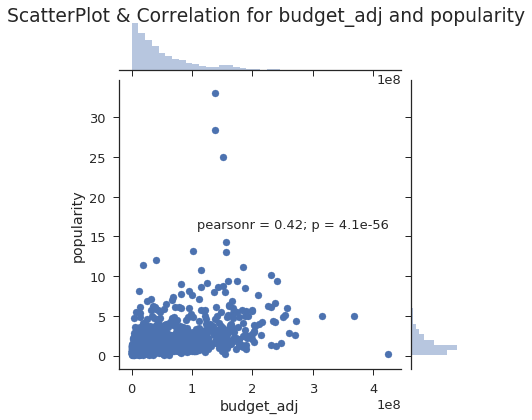

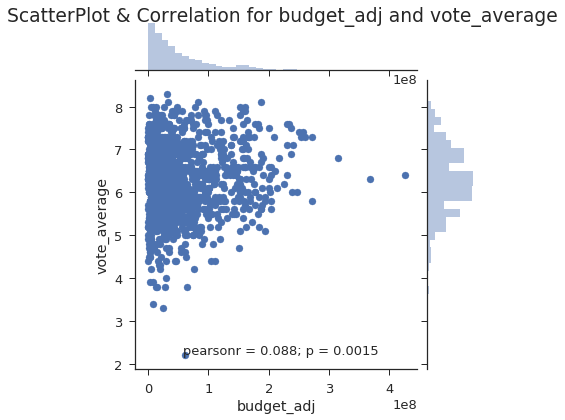

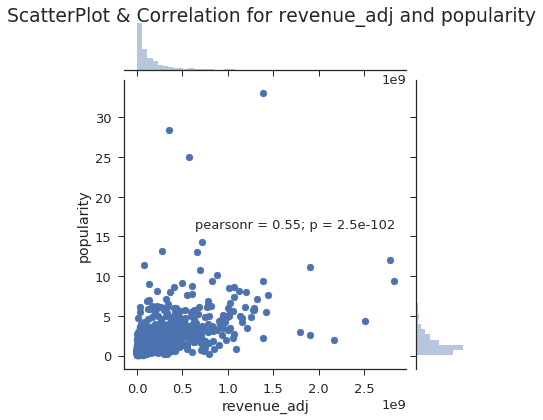

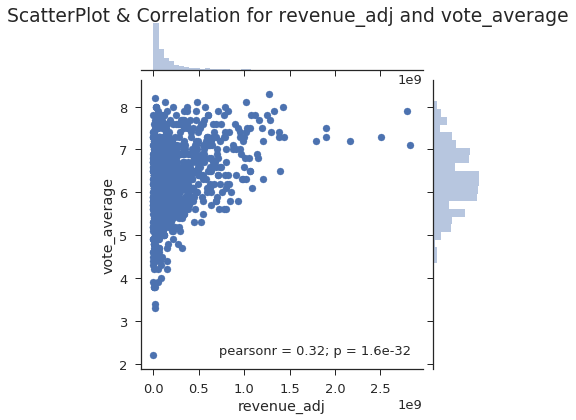

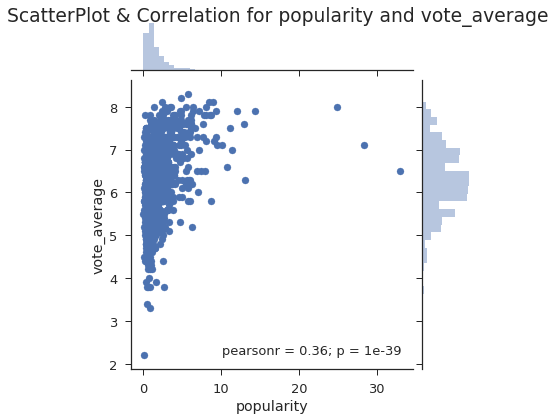

In [79]:
# Correlation Plots

#get
aux_df = tmdb[['revenue_adj', 'budget_adj', 'popularity', 'vote_average']]

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3, style="ticks")

f1 = sns.jointplot(x = "budget_adj", y = "revenue_adj", kind = "scatter", data = aux_df)
f1.fig.suptitle('ScatterPlot & Correlation for budget_adj and revenue_adj')

f2 = sns.jointplot(x = "budget_adj", y = "popularity", kind = "scatter", data = aux_df)
f2.fig.suptitle('ScatterPlot & Correlation for budget_adj and popularity')

f3 = sns.jointplot(x = "budget_adj", y = "vote_average", kind = "scatter", data = aux_df)
f3.fig.suptitle('ScatterPlot & Correlation for budget_adj and vote_average')

f4 = sns.jointplot(x = "revenue_adj", y = "popularity", kind = "scatter", data = aux_df)
f4.fig.suptitle('ScatterPlot & Correlation for revenue_adj and popularity')

f5 = sns.jointplot(x = "revenue_adj", y = "vote_average", kind = "scatter", data = aux_df)
f5.fig.suptitle('ScatterPlot & Correlation for revenue_adj and vote_average')

f6 = sns.jointplot(x = "popularity", y = "vote_average", kind = "scatter", data = aux_df)
f6.fig.suptitle('ScatterPlot & Correlation for popularity and vote_average')

**Findings:**

According to Pearson Coefficient there is a Postive Correlation between Adjusted Revenue, Adjusted Budget and Popularity.

Moroever there is a Weak Positive Correlation between the Average Votes with the other 3 Variables (adjusted revenue, adjusted budget and popularity)

If we want to see all these relations in a single plot, Seaborn's Pairplot can provide this Functionality

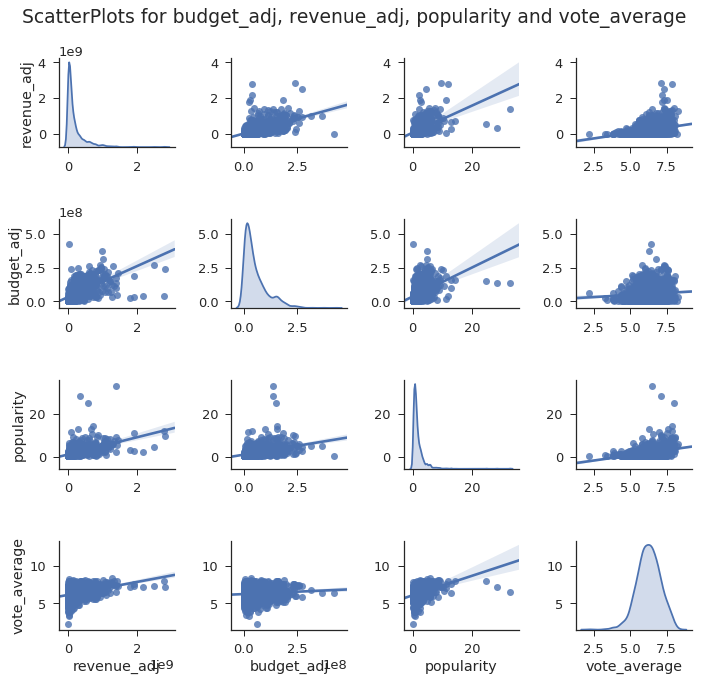

In [80]:
f1 = sns.pairplot(aux_df, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
f1.fig.suptitle('ScatterPlots for budget_adj, revenue_adj, popularity and vote_average\n')
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

**Findings:**

Revenue could not be 0's so we need to Remove it.

Movie that Generate Highest Revenue is **'AVTAR'**
Movie that Generate Lowest Revenue is **'MALLRATS'**
Movie that Cost Highest Budget is **'The WARRIOR'S WAY'**
Movie that Cost Lowest Budget is **'LOST & FOUND'**
Movie that is Most Profitable Over the Years is **'AVTAR'**
Movie that is Least Profitable Over the Years is **'THE WARRIOR'S WAY'**
Movie that has Longest Runtime was **'CARLOS'**
Moive that has Shortest Runtime wasa **'MICKEY'S CHRISTMAS CAROL'**

**Averages:**

**Average Runtime is:** (109.12290033594626)

**Average Profit is:** (75,118,992.06)

**Average Revenue is:** (113,833,739.16)

**Average Budget is:** (38,714,747.10)

**Top 5 Genres are:**

Drama

Comedy

Thriller

Action

Adventure

**Top 5 most successful cast are:**

Robert De Niro

Samuel L. Jackson

Nicolas Cage

Matt Damon

Tom Hanks

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])